#  *k*-Nearest Neighbours - voorbeeld distance en probability

In dit notebook wordt de werking van de hyperparameter `weights` toegelicht. Je kunt kiezen voor `uniform` (= democratische meerderheid) of `distance` (hierbij wordt de afstand meegenomen in de weging).

Daarnaast wordt de output variabele `probability` toegelicht: deze zegt iets over de waarschijnlijkheid van een voorspelling.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Minidatasetje met twee features en een target

data = {'x1': [0, 0, 0, 1, 1, 2, 2, 2],
        'x2': [0, 1, 2, 0, 2, 0, 1, 2],
        'target': ['red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red']}

df = pd.DataFrame (data, columns = ['x1','x2','target'])

print (df)

   x1  x2 target
0   0   0    red
1   0   1   blue
2   0   2    red
3   1   0   blue
4   1   2   blue
5   2   0    red
6   2   1   blue
7   2   2    red


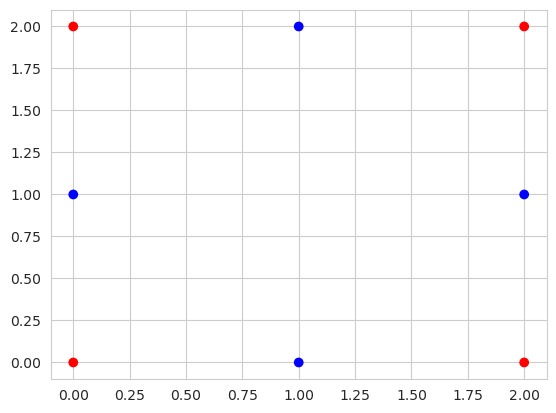

In [22]:
# Zo zijn de 8 punten verdeeld, we gaan hierna kijken naar het punt op het coördinaat (1, 1)

plt.scatter(df['x1'], df['x2'], c=df['target'])

In [23]:
# Model aanmaken

knn = KNeighborsClassifier()

In [24]:
# Dataset splitsen

X = df[['x1', 'x2']]
y = df['target']

In [25]:
# Scenario 1 - 100% blauw
# In dit scenario worden de 4 dichtsbijzijnde punten gekozen, dat zijn de 4 blauwe punten
# Probability is logischerwijs 100% voor blauw
# Merk op: in de praktijk moet k altijd oneven zijn, maar voor dit voorbeeld laat ik dat principe ff varen

knn.set_params(n_neighbors = 4, weights = 'uniform')
knn.fit(X,y)
new_item = [1, 1]
pred_new_item_proba = knn.predict_proba([new_item])
print(pred_new_item_proba)

[[1. 0.]]


/home/max/.miniconda3/envs/CM2024/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
# Scenario 2 - 50% blauw, 50% rood vanwege uniforme afstand
# Nu pakken we k = 8, nu vallen alle punten daarin
# Proba is nu 50% voor rood en 50% voor blauw

knn.set_params(n_neighbors = 8, weights = 'uniform')
knn.fit(X,y)
new_item = [1, 1]
pred_new_item_proba = knn.predict_proba([new_item])
print(pred_new_item_proba)

[[0.5 0.5]]


/home/max/.miniconda3/envs/CM2024/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [27]:
# Scenario 3 - 100% blauw
# We passen nu de weights aan naar distance
# Voor dit scenario verandert er niks

knn.set_params(n_neighbors = 4, weights = 'distance')
knn.fit(X,y)
new_item = [1, 1]
pred_new_item_proba = knn.predict_proba([new_item])
print(pred_new_item_proba)

[[1. 0.]]


/home/max/.miniconda3/envs/CM2024/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [28]:
# Scenario 4 - Meer blauw dan rood vanwege afstand
# Maar voor dit scenario verandert er nu wel iets
# De stand bij 'uniform' was gelijk, maar nu wint blauw van rood omdat de blauwe punten dichterbij liggen

knn.set_params(n_neighbors = 8, weights = 'distance')
knn.fit(X,y)
new_item = [1, 1]
pred_new_item_proba = knn.predict_proba([new_item])
print(pred_new_item_proba)

[[0.58578644 0.41421356]]


/home/max/.miniconda3/envs/CM2024/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
